In [17]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
ftv = pd.read_csv('https://bit.ly/3F8YOTd')

In [19]:
ftv.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,notes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.70,8.00,7.00,21,"These are many small independent stories, whic..."
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.50,6.00,7.00,4,"Luigi Perelli, the director of the ""Piovra"", o..."
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.60,6.00,5.00,9,"""Ecological"" story with a happy ending, not wi..."
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.00,8.00,6.00,18,A cast of will be famous for Levinson's direct...
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.90,5.33,7.00,14,Taken from the play by Armando Curcio that the...


In [20]:
len(ftv.columns)

13

In [21]:
ftv.shape

(37711, 13)

In [22]:
ftv.dtypes

filmtv_id         int64
title            object
year              int64
genre            object
duration          int64
country          object
directors        object
actors           object
avg_vote        float64
critics_vote    float64
public_vote     float64
total_votes       int64
notes            object
dtype: object

In [23]:
ftv.isna().sum()

filmtv_id           0
title               0
year                0
genre              88
duration            0
country             9
directors          29
actors           1868
avg_vote            0
critics_vote     4085
public_vote       219
total_votes         0
notes           19606
dtype: int64

## Percent of movies produced in USA with regard to other countries

In [24]:
pd.options.display.float_format = "{:,.2f}".format
len(ftv[ftv.country == 'United States']) / len(ftv) * 100

40.75468696136406

## Fill the null value of public vote with its total average

In [25]:
meanNoneNullVotes =ftv['public_vote'][ftv.public_vote.isna() == False].mean()
ftv['public_vote'][ftv.public_vote.isna() == True] = ftv['public_vote'][ftv.public_vote.isna() == True].fillna(meanNoneNullVotes)
#ftv.loc[ftv['public_vote'].isna() ==True, 'public_vote'].fillna(value = meanNoneNullVotes)
# loc method here for chaning values 'inplace' does not working

<ipython-input-25-2c560a364bf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ftv['public_vote'][ftv.public_vote.isna() == True] = ftv['public_vote'][ftv.public_vote.isna() == True].fillna(meanNoneNullVotes)


In [26]:
ftv['public_vote'].isna().sum()

0

In [27]:
# An example of changed value
ftv.public_vote[821]

5.963565560652939

## Drop the rows with no country 

In [12]:
#this way to drop null values is not working
ftv.country.dropna(axis=0, how='any', inplace = True)
ftv['country'].isna().sum()

9

In [13]:
ftv.dropna(subset =['country'], inplace=True)
ftv['country'].isna().sum()

0

In [14]:
ftv.isna().sum()

filmtv_id           0
title               0
year                0
genre              88
duration            0
country             0
directors          29
actors           1867
avg_vote            0
critics_vote     4082
public_vote         0
total_votes         0
notes           19601
dtype: int64

## Which genres were most rated

In [28]:
ftv['AvgPerTotal'] = ftv.avg_vote * ftv.total_votes / 100

In [31]:
ftv.groupby(['genre']).AvgPerTotal.agg(['mean', 'count', 'sum']).sort_values('mean').tail()

,mean,count,sum
genre,,,
Mélo,4.92,103,506.44
Grotesque,5.22,237,"1,238.32"
Noir,6.27,232,"1,454.98"
Super-hero,12.63,77,972.27
Gangster,13.09,54,706.82


In [74]:
ftv['AvgPerTotal'] 

0       1.62
1       0.26
2       0.50
3       1.26
4       0.83
        ... 
37706   0.04
37707   0.06
37708   0.06
37709   0.03
37710   0.02
Name: AvgPerTotal, Length: 37711, dtype: float64

## In Which countries were the most movies in 21th and 20th century poduced? 

In [65]:
 ftv['mov20'] = ftv[(ftv.year >= 1901 ) & (ftv.year <= 1999 )].year
 ftv['mov21'] = ftv[(ftv.year >= 2000 ) & (ftv.year <= 2022 )].year

<AxesSubplot:xlabel='country'>

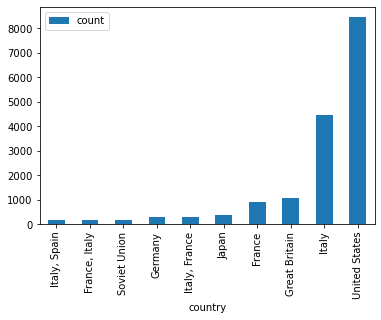

In [66]:
ftv.groupby('country').mov20.agg(['count']).sort_values('count').tail(10).plot(kind='bar')

<AxesSubplot:xlabel='country'>

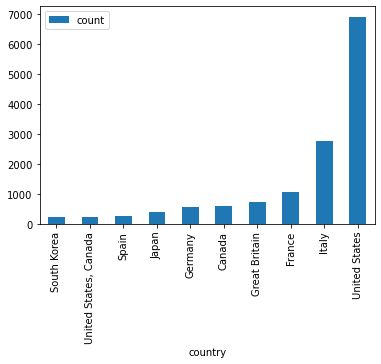

In [73]:
ftv.groupby('country').mov21.agg(['count']).sort_values('count').tail(10).plot(kind='bar')